In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
import joblib


ModuleNotFoundError: No module named 'seaborn'

In [95]:
df = pd.read_csv("Crime Prediction in Chicago_Dataset.csv")

# Exploring the dataset

In [96]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12592454,JF113025,1/14/2022 15:55,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,12785595,JF346553,8/5/2022 21:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,12808281,JF373517,8/14/2022 14:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,12888104,JF469015,11/10/2022 3:47,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,13209277,JG422539,8/15/2022 9:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239558 non-null  int64  
 1   Case Number           239558 non-null  object 
 2   Date                  239558 non-null  object 
 3   Block                 239558 non-null  object 
 4   IUCR                  239558 non-null  object 
 5   Primary Type          239558 non-null  object 
 6   Description           239558 non-null  object 
 7   Location Description  238593 non-null  object 
 8   Arrest                239558 non-null  bool   
 9   Domestic              239558 non-null  bool   
 10  Beat                  239558 non-null  int64  
 11  District              239558 non-null  int64  
 12  Ward                  239548 non-null  float64
 13  Community Area        239558 non-null  int64  
 14  FBI Code              239558 non-null  object 
 15  

In [98]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [99]:
df = df.drop(columns=['Location', 'Y Coordinate', 'X Coordinate', 'FBI Code','Updated On','Case Number','ID','Year','Date'], axis=1)

In [100]:
# df['Date'] = pd.to_datetime(df['Date'])

In [101]:
df.describe()

,Beat,District,Ward,Community Area,Latitude,Longitude
count,239558.000000,239558.00000,239548.000000,239558.000000,234891.000000,234891.000000
mean,1154.023276,11.31053,23.385029,36.268474,41.845612,-87.668599
std,707.909870,7.07555,14.210565,21.553814,0.088833,0.061010
min,111.000000,1.00000,1.000000,1.000000,36.619446,-91.686566
25%,533.000000,5.00000,9.000000,22.000000,41.769168,-87.710150
50%,1033.000000,10.00000,24.000000,32.000000,41.863073,-87.661465
75%,1731.000000,17.00000,35.000000,53.000000,41.909023,-87.626402
max,2535.000000,31.00000,50.000000,77.000000,42.022548,-87.524532


In [102]:
df.isnull().sum()

Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     965
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
Latitude                4667
Longitude               4667
dtype: int64

In [103]:
df['Arrest'].value_counts()
#the data is imbalanced, so we can handle it by class weight  method

Arrest
False    211505
True      28053
Name: count, dtype: int64

In [104]:
df.duplicated().sum()

np.int64(22872)

### Detecting Outliers

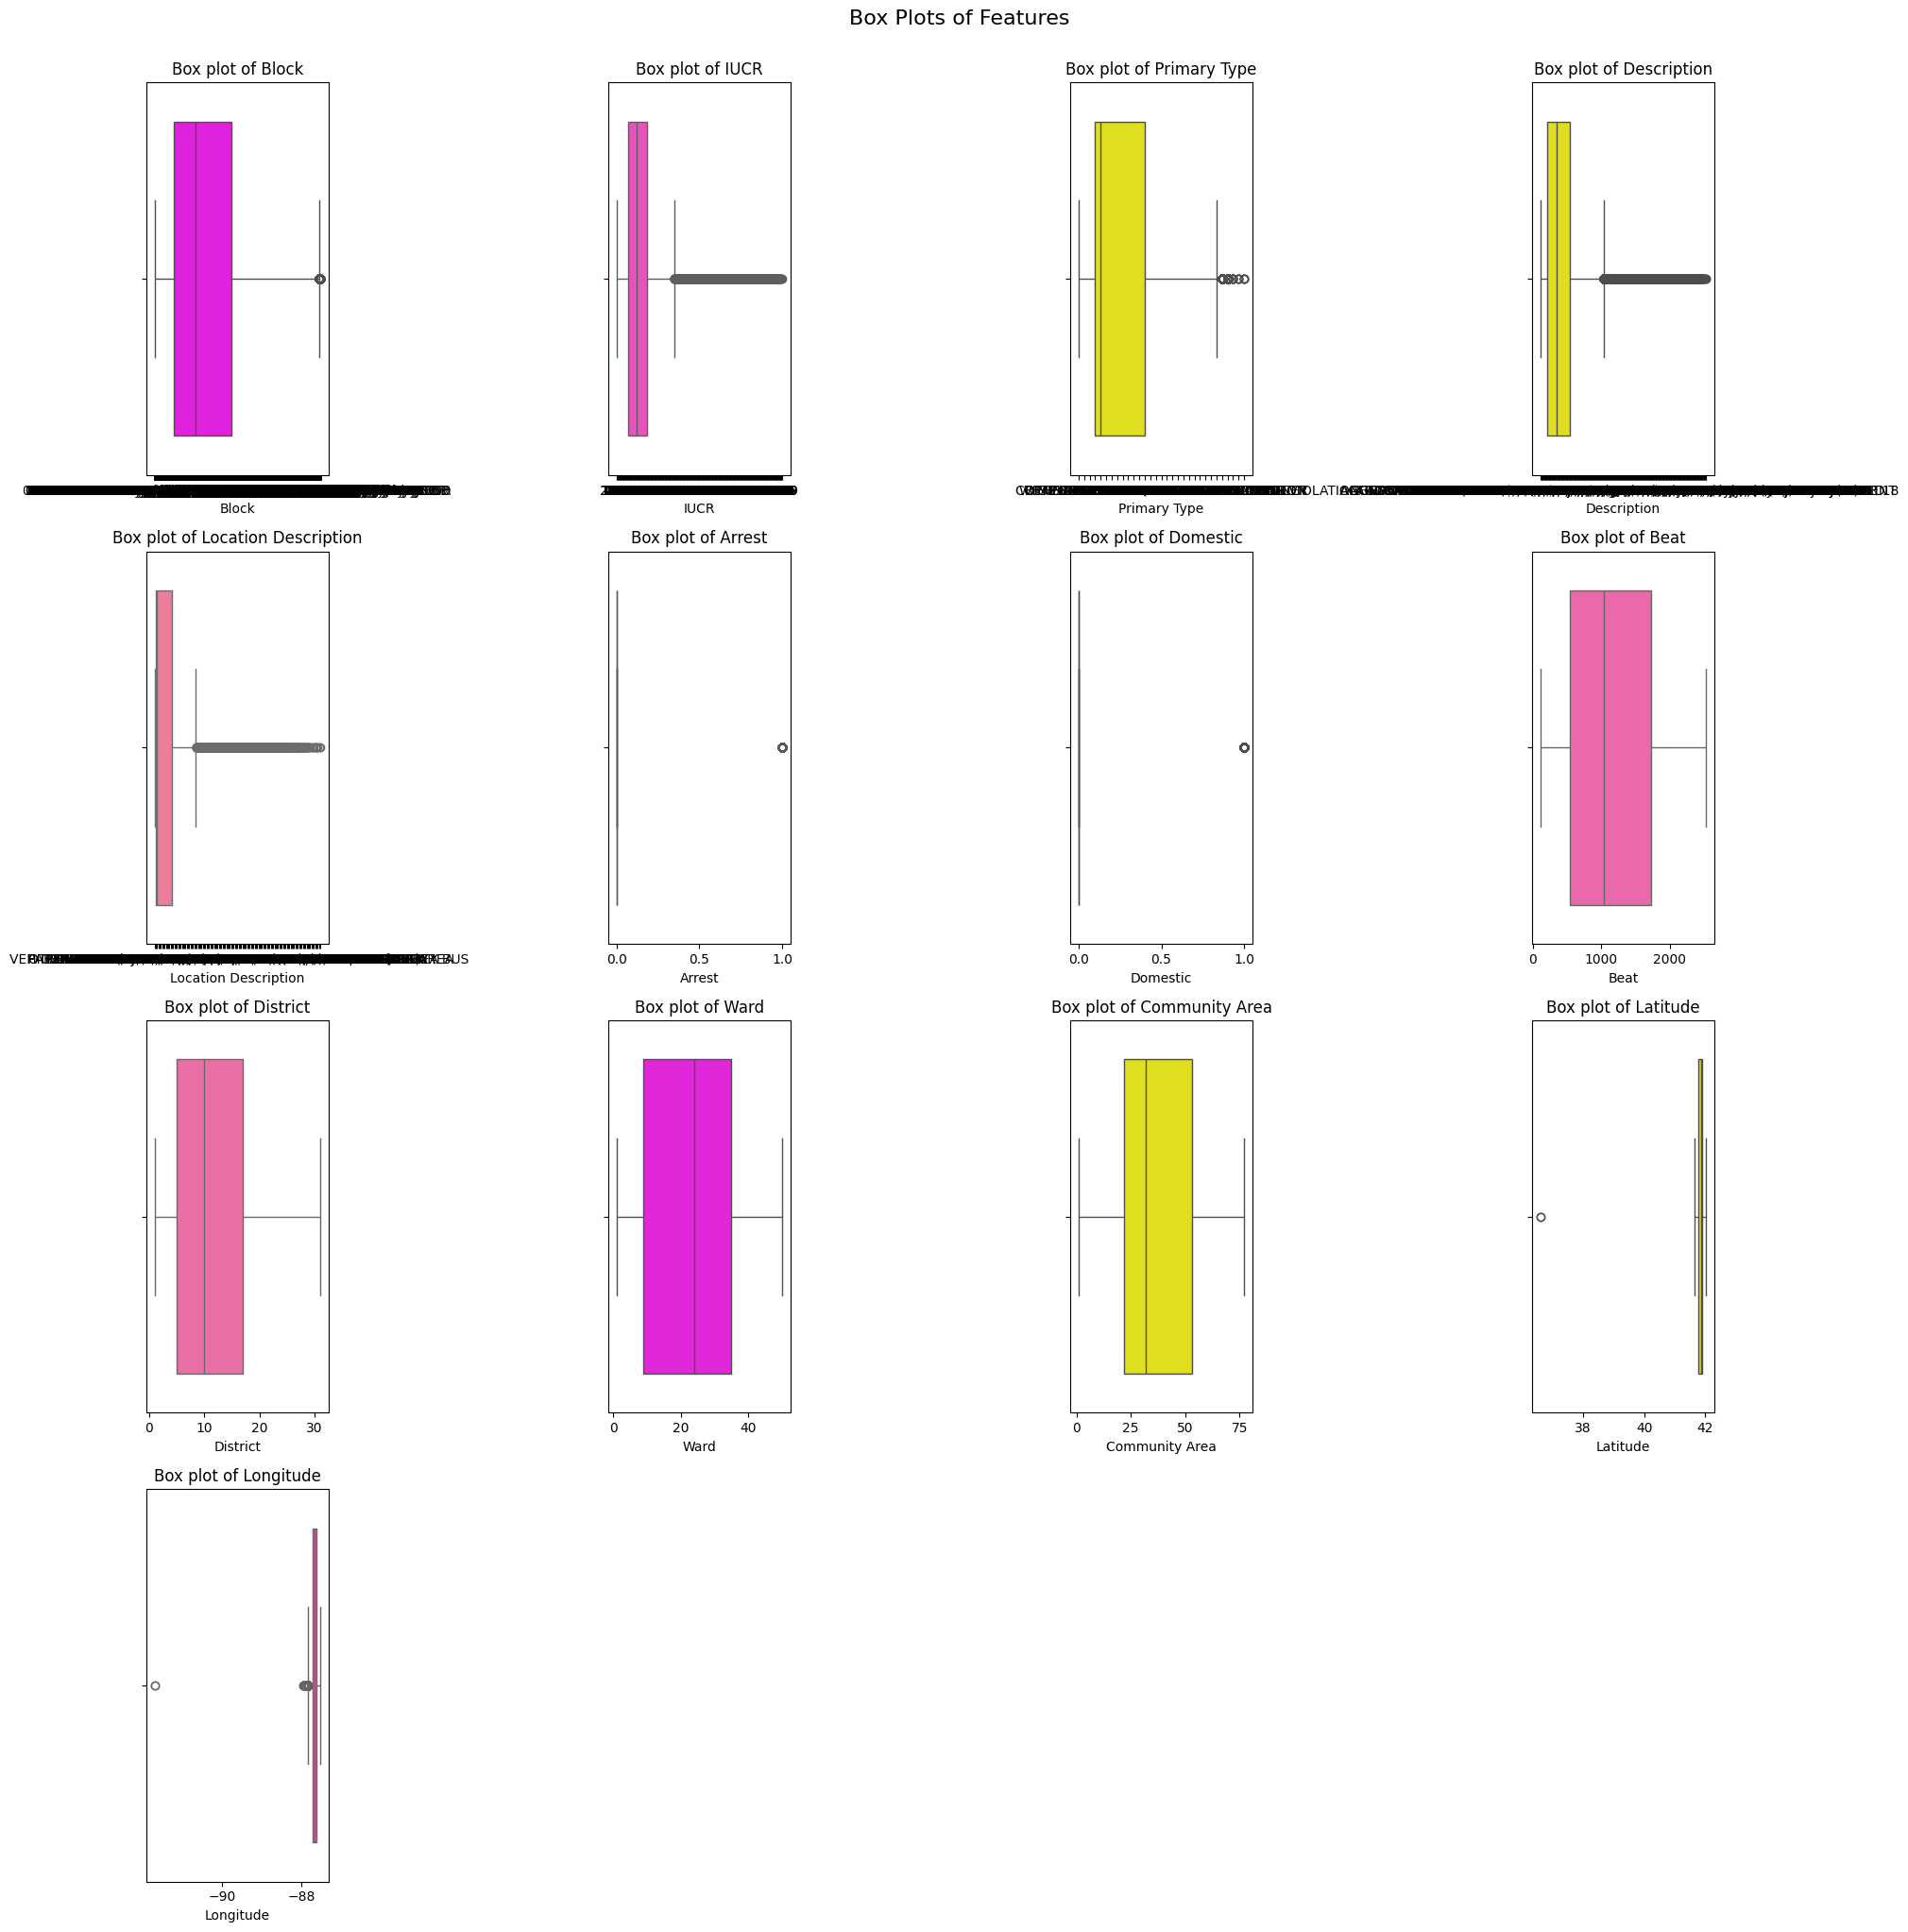

In [105]:
num_colors = 20
indices = np.linspace(0, 400, 1000, dtype=int)
np.random.shuffle(indices)
selected_indices = indices[:num_colors]
colors = [cm.spring(x) for x in selected_indices]
#Box Plot
def print_boxplot(df):
    n = len(df.columns)
    rows = int(np.ceil(n/4))

    fig, axs = plt.subplots(rows, 4, figsize=(20, 5*rows))

    # Flatten the axes array, to make iterating over it easier
    axs = axs.flatten()

    for i, (c, color) in enumerate(zip(df, colors)):
        sns.boxplot(x=df[c],color=color, ax=axs[i])
        axs[i].set_title(f'Box plot of {c}')

    # Remove any unused subplots
    if n % 4:
        for j in range(n, rows*4):
            fig.delaxes(axs[j])

    plt.tight_layout()
    plt.suptitle('Box Plots of Features', x=0.5, y=1.02, fontsize=16)
    plt.show()

print_boxplot(df)

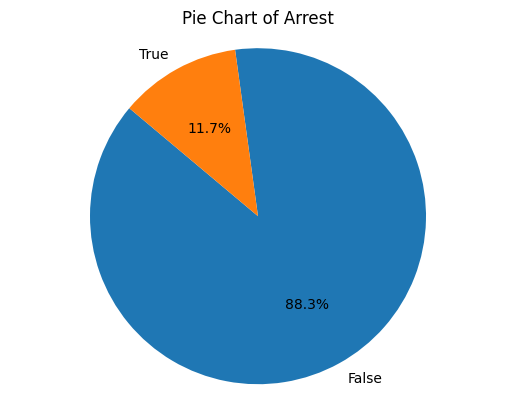

In [106]:
counts = df['Arrest'].value_counts() # Create the pie chart 
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140) 
plt.axis('equal') 
plt.title('Pie Chart of Arrest') 
plt.show()

# Data Cleaning

In [107]:
df=df.dropna()

In [108]:
df=df.drop_duplicates()

# Data preprocessing

## Encoding Categorical Features

In [109]:
# Label Encoding
le = LabelEncoder()
df['Arrest'] = le.fit_transform(df['Arrest'])

In [110]:
df['Arrest'].value_counts()

Arrest
0    187013
1     24955
Name: count, dtype: int64

In [111]:
le_domestic = LabelEncoder()
df['Domestic'] = le_domestic.fit_transform(df['Domestic'])
df['Domestic'].value_counts()

encoding_map_domestic = pd.DataFrame({
        'Original Value': le_domestic.classes_,
        'Encoded Value': range(len(le_domestic.classes_))
    })

    # Save the mapping DataFrame to a CSV file
encoding_map_domestic.to_csv(f'encoding_map_domestic.csv', index=False)


In [112]:
le_block = LabelEncoder()
df['Block'] =le_block.fit_transform(df['Block'])
df['Block'].value_counts()

encoding_map_block = pd.DataFrame({
        'Original Value': le_block.classes_,
        'Encoded Value': range(len(le_block.classes_))
    })

    # Save the mapping DataFrame to a CSV file
encoding_map_block.to_csv(f'encoding_map_block.csv', index=False)

In [113]:
le3 = LabelEncoder()
df['IUCR'] = le3.fit_transform(df['IUCR'])
df['IUCR'].value_counts()

encoding_map_IUCR = pd.DataFrame({
        'Original Value': le3.classes_,
        'Encoded Value': range(len(le3.classes_))
    })

    # Save the mapping DataFrame to a CSV file
encoding_map_IUCR.to_csv(f'encoding_map_IUCR.csv', index=False)

In [114]:
le_location_description = LabelEncoder()
df['Location Description'] = le_location_description.fit_transform(df['Location Description'])
df['Location Description'].value_counts()

encoding_map_disc = pd.DataFrame({
        'Original Value': le_location_description.classes_,
        'Encoded Value': range(len(le_location_description.classes_))
    })

    # Save the mapping DataFrame to a CSV file
encoding_map_disc.to_csv(f'encoding_map_disc.csv', index=False)

In [115]:
le_primary_type = LabelEncoder()
df['Primary Type'] = le_primary_type.fit_transform(df['Primary Type'])
df['Primary Type'].value_counts()
encoding_map = pd.DataFrame({
        'Original Value': le_primary_type.classes_,
        'Encoded Value': range(len(le_primary_type.classes_))
    })

    # Save the mapping DataFrame to a CSV file
encoding_map.to_csv(f'encoding_map_primary.csv', index=False)


In [116]:
le_description = LabelEncoder()
df['Description'] = le_description.fit_transform(df['Description'])
df['Description'].value_counts()



encoding_map_discription = pd.DataFrame({
        'Original Value': le_description.classes_,
        'Encoded Value': range(len(le_description.classes_))
    })

    # Save the mapping DataFrame to a CSV file
encoding_map_discription.to_csv(f'encoding_map_discription.csv', index=False)



In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211968 entries, 0 to 239557
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Block                 211968 non-null  int64  
 1   IUCR                  211968 non-null  int64  
 2   Primary Type          211968 non-null  int64  
 3   Description           211968 non-null  int64  
 4   Location Description  211968 non-null  int64  
 5   Arrest                211968 non-null  int64  
 6   Domestic              211968 non-null  int64  
 7   Beat                  211968 non-null  int64  
 8   District              211968 non-null  int64  
 9   Ward                  211968 non-null  float64
 10  Community Area        211968 non-null  int64  
 11  Latitude              211968 non-null  float64
 12  Longitude             211968 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 22.6 MB


## Calculating Correlation Between the Features

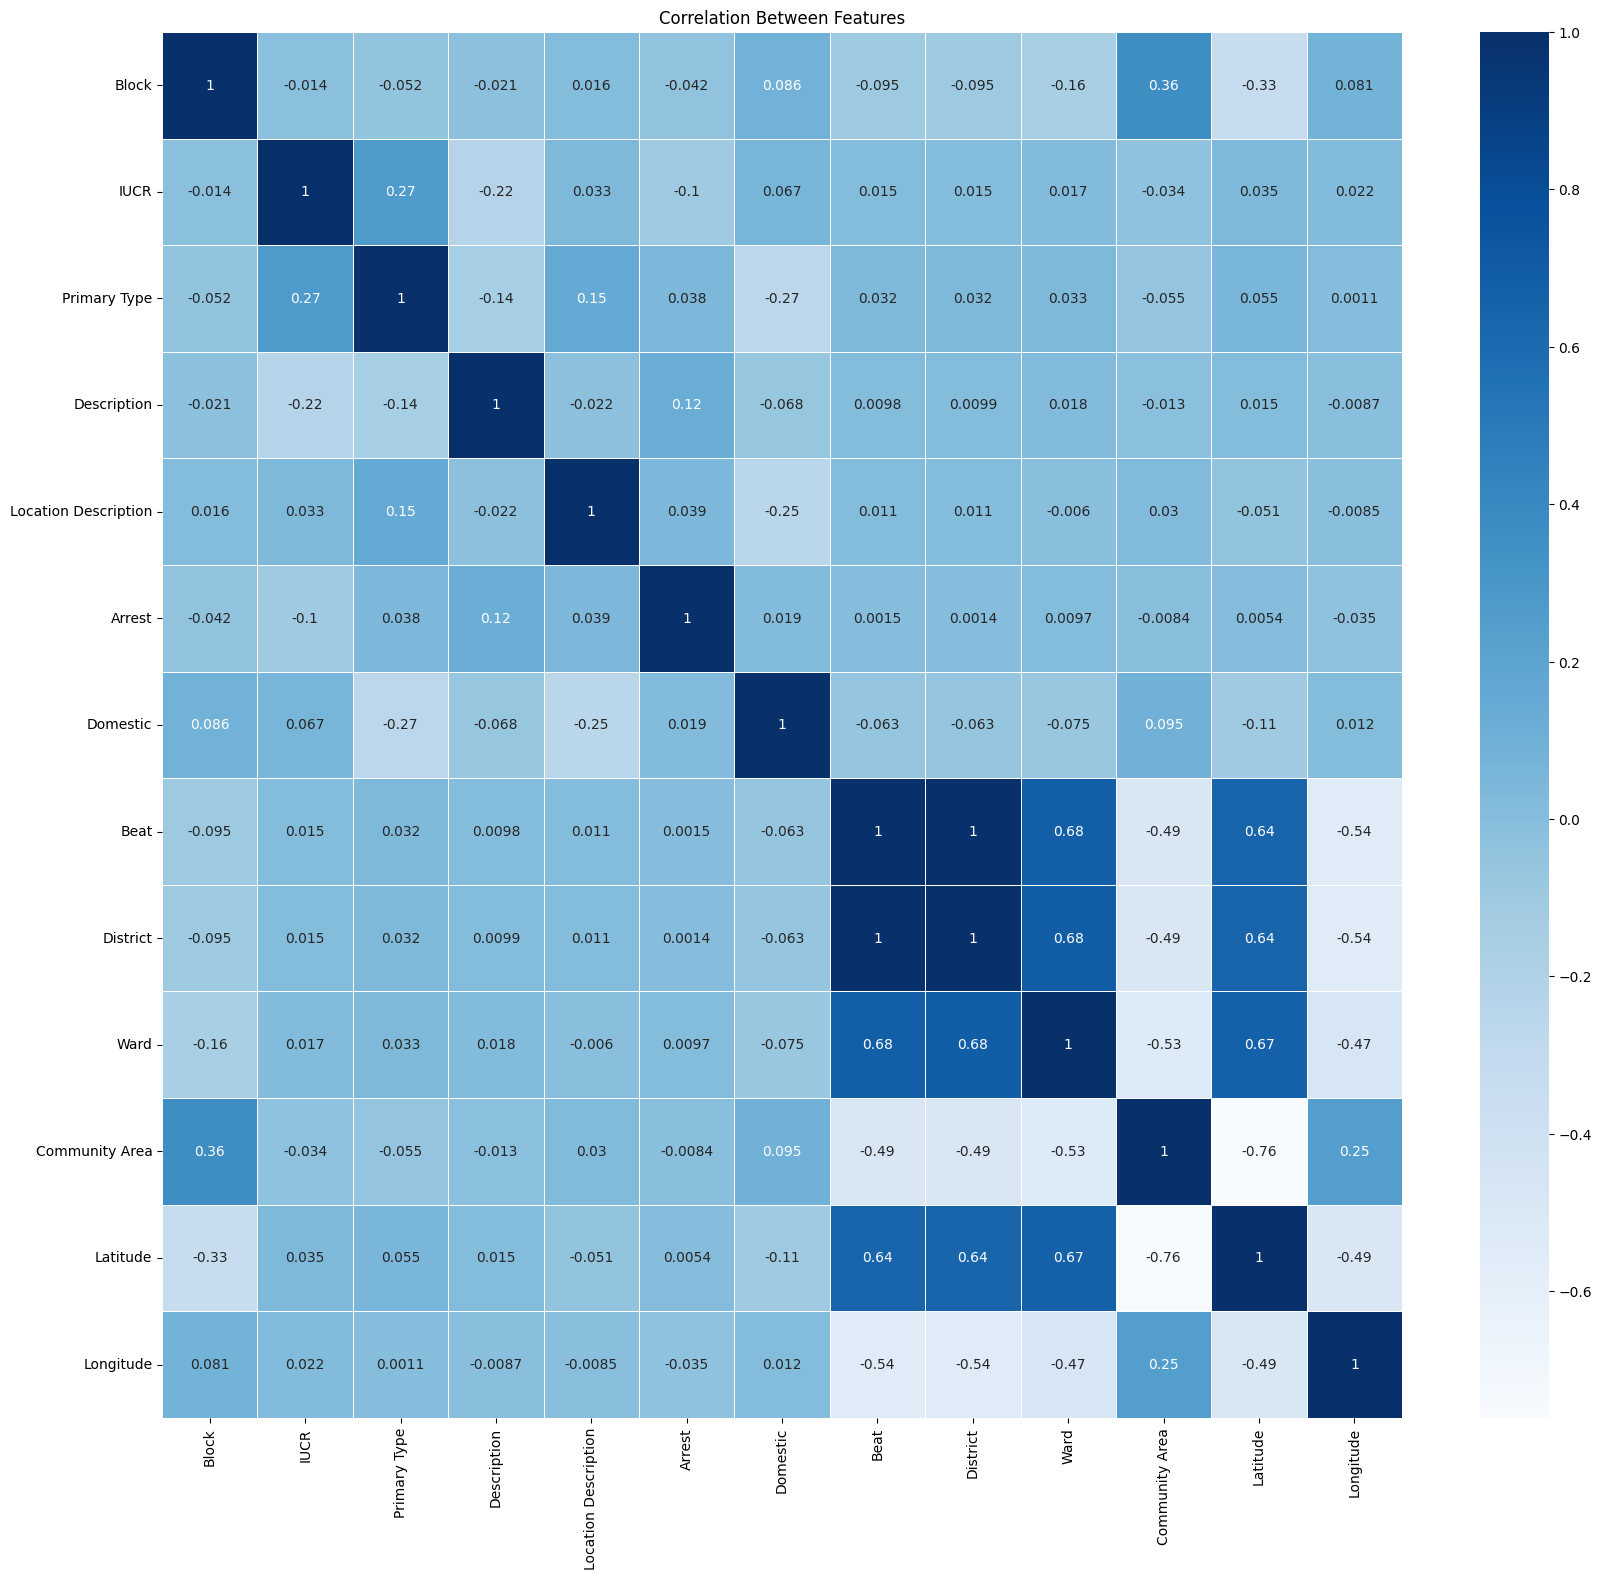

In [118]:
# Make Correlation Matrix to explore the correlation between features
plt.figure(figsize= (20, 18))
sns.heatmap( data = df.select_dtypes(include=np.number).corr() , annot = True , linewidth = 0.5 , cmap='Blues')
plt.title('Correlation Between Features')
plt.show()

## Feature Scaling

In [119]:
# Extract the datetime column
# date_col = df['Date']
numerical_cols = df.select_dtypes(include=[np.number])
scaler = MinMaxScaler()
# scaled_numerical_df = pd.DataFrame(scaler.fit_transform(numerical_cols), columns=numerical_cols.columns)
# df = pd.concat([scaled_numerical_df, date_col], axis=1)
df = pd.DataFrame(scaler.fit_transform(numerical_cols), columns=numerical_cols.columns)


In [120]:
X = df.drop(['Arrest'], axis=1)
y = df['Arrest']

# Models

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split( X , y , test_size=0.2 , random_state=42 , stratify =y)

### balance the data before the models

In [122]:
# # Apply SMOTE only on the training data
# # smote = SMOTE(sampling_strategy=0.5, random_state=42)  
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # Convert back to a DataFrame
# resampled_df = pd.concat(
#     [pd.DataFrame(X_resampled, columns=X.columns), 
#      pd.DataFrame(y_resampled, columns=['Arrest'])], 
#     axis=1
# )
# print(resampled_df['Arrest'].value_counts()) 

In [123]:
model_arr=[]
# Accuracy_arr
accuracy_arr=[]

### Getting Important Features From Random Forest Classifier

In [124]:
# Instantiate SMOTE and Random Forest Classifier
from sklearn.model_selection import cross_validate

smote = SMOTE(random_state=42)
rfc = RandomForestClassifier(random_state=42)

# Create a pipeline
pipeline = make_pipeline(smote, rfc)

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(
    pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=False
)

# Display cross-validation results
print("Cross-Validation Metrics:")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f}")

Cross-Validation Metrics:
Accuracy: 0.9033


In [125]:
# Train on the full dataset
pipeline.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


Random Forest - Confusion Matrix (Test Data):
[[35577  1826]
 [ 2377  2614]]
Random Forest - train Accuracy (Test Data): 0.9927
Random Forest - Accuracy (Test Data): 0.9009

Random Forest - Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     37403
         1.0       0.59      0.52      0.55      4991

    accuracy                           0.90     42394
   macro avg       0.76      0.74      0.75     42394
weighted avg       0.90      0.90      0.90     42394



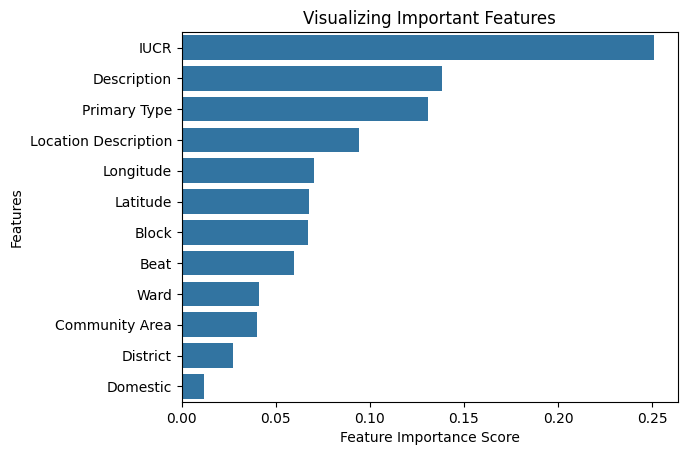

In [126]:
# Evaluate on test data
y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print test results
print("\nRandom Forest - Confusion Matrix (Test Data):")
print(test_conf_matrix)
print(f"Random Forest - train Accuracy (Test Data): {train_accuracy:.4f}")
print(f"Random Forest - Accuracy (Test Data): {test_accuracy:.4f}")
print("\nRandom Forest - Classification Report (Test Data):")
cr=classification_report(y_test, y_pred_test)
print(cr)

# Feature importance visualization
feature_importances = pd.Series(
    pipeline.named_steps["randomforestclassifier"].feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

sns.barplot(x=feature_importances.values, y=feature_importances.index, orient='h')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

# Save the model
joblib.dump(pipeline, 'random_forest_model.joblib')

# Save the metrics
metrics = {
    "accuracy": test_accuracy,
    "classification_report": cr,
    "confusion_matrix": test_conf_matrix.tolist()
}

metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("rfc_metrics.csv", index=False)

# Append to model and accuracy arrays (if applicable)
model_arr.append('Random Forest')
accuracy_arr.append(test_accuracy)

In [127]:
df=df.drop(columns=['Domestic','District'],axis=1)

### logistic regression

In [128]:
log_reg = LogisticRegression(class_weight='balanced')

y_pred = cross_val_predict(log_reg, X_train, y_train, cv=5)

# Train and evaluate using cross-validation
accuracy = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy').mean()

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)

print(f"Accuracy (CV Mean): {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_train, y_pred))

Confusion Matrix:
[[92444 57166]
 [ 8199 11765]]
Accuracy (CV Mean): 0.6145

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.62      0.74    149610
         1.0       0.17      0.59      0.26     19964

    accuracy                           0.61    169574
   macro avg       0.54      0.60      0.50    169574
weighted avg       0.83      0.61      0.68    169574



In [129]:
# Now fit the model to the entire training data for evaluation on test data
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [142]:
# Predict on the test data
y_pred_test = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

# Test accuracy and other metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

# Confusion matrix for test data
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print results for test data
print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)

print(f"train Accuracy (Test Data): {train_accuracy:.4f}")
print(f"Accuracy (Test Data): {test_accuracy:.4f}")

print("\nClassification Report (Test Data):")
cr=classification_report(y_test, y_pred_test)
print(cr)
# Save the model
joblib.dump(log_reg, 'logistic_reg_model')

metrics = {
    "accuracy": test_accuracy, 
    "classification_report": cr,
 "confusion_matrix": conf_matrix.tolist()
}
model_arr.append("linear regression")
accuracy_arr.append(test_accuracy)

# # Logistic Regression parameters

# lr_params = {
#     'penalty': ['l1', 'l2', 'elasticnet', None],
#     'C': [0.1, 1, 10],
#     'solver': ['lbfgs', 'liblinear', 'saga'],
#     'max_iter': [100, 500, 1000]
# }

# grid_search = GridSearchCV(
#     estimator=log_reg,
#     param_grid=lr_params,
#     cv=5,  # 5-fold cross-validation
#     scoring='accuracy',
#     n_jobs=-1,  # Use all available processors
#     verbose=1  # Show progress
# )
# grid_search.fit(X_train, y_train)
# print(f"Best Parameters for logistic regression: {grid_search.best_params_}")
# print(f"Best Cross-Validation Accuracy for  logistic regression: {grid_search.best_score_:.4f}")
# print("-" * 50)

metrics_df = pd.DataFrame([metrics])

metrics_df.to_csv("log_metrics", index=False)


Confusion Matrix (Test Data):
[[23022 14381]
 [ 2077  2914]]
train Accuracy (Test Data): 0.6136
Accuracy (Test Data): 0.6118

Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.92      0.62      0.74     37403
         1.0       0.17      0.58      0.26      4991

    accuracy                           0.61     42394
   macro avg       0.54      0.60      0.50     42394
weighted avg       0.83      0.61      0.68     42394



### decision tree

In [131]:
# Initialize the SMOTE and Decision Tree Classifier
smote = SMOTE(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

# Create a pipeline to apply SMOTE inside cross-validation
pipeline = make_pipeline(smote, decision_tree)

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_dt = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Cross-validation scores: {accuracy_dt}")
print(f"Average cross-validation accuracy: {accuracy_dt.mean():.4f}")

# Now fit the pipeline on the full training data to evaluate on test data
pipeline.fit(X_train, y_train)

# Evaluate the model on test data
y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

# Testing accuracy and other metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

# Confusion matrix for test data
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print results for testing data
print("\nDecision Tree - Confusion Matrix (Test Data):")
print(test_conf_matrix)

print(f"Decision Tree - Accuracy (Test Data): {test_accuracy:.4f}")


print("\nDecision Tree - Classification Report (Test Data):")
cr=classification_report(y_test, y_pred_test)
print(cr)
model_arr.append("Decision Tree")
accuracy_arr.append(test_accuracy)

# Save the model
joblib.dump(pipeline, 'decision_tree_model')
metrics = {
    "accuracy": test_accuracy, 
    "classification_report": cr, 
 "confusion_matrix": conf_matrix.tolist()
}

#metrics["confusion_matrix"] = str(metrics["confusion_matrix"])


metrics_df = pd.DataFrame([metrics])

metrics_df.to_csv("dt_metrics", index=False)



Cross-validation scores: [0.8690255  0.87259325 0.87129589 0.87212148 0.86943445]
Average cross-validation accuracy: 0.8709

Decision Tree - Confusion Matrix (Test Data):
[[34293  3110]
 [ 2396  2595]]
Decision Tree - Accuracy (Test Data): 0.8701

Decision Tree - Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93     37403
         1.0       0.45      0.52      0.49      4991

    accuracy                           0.87     42394
   macro avg       0.69      0.72      0.71     42394
weighted avg       0.88      0.87      0.87     42394



### KNN

In [132]:

# # try different values of k
# k_values = range(10, 20)                   #with this range the running time will be more than an hour...:) change it to (490,500) for best k value
# accuracy_scores = []

# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     pipeline = make_pipeline(smote, knn)
#     scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
#     accuracy_scores.append(scores.mean())

# # find the best k
# best_k = k_values[np.argmax(accuracy_scores)]
# print("Best k:", best_k)

In [133]:
# plt.plot(k_values, accuracy_scores, marker='o')
# plt.xlabel('Number of Neighbors (k)')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs. k in KNN')
# plt.grid()
# plt.show()

In [134]:
knn_optimized = KNeighborsClassifier(n_neighbors=7)

# Cross-validation scores
accuracy_knn = cross_val_score(knn_optimized, X_train, y_train, cv=cv, scoring='accuracy').mean()
precision_knn = cross_val_score(knn_optimized, X_train, y_train, cv=cv, scoring='precision').mean()
recall_knn = cross_val_score(knn_optimized, X_train, y_train, cv=cv, scoring='recall').mean()
f1_knn = cross_val_score(knn_optimized, X_train, y_train, cv=cv, scoring='f1').mean()

# Print results for cross-validation (training data)
print("KNN - Cross-validation results:")
print(f"Accuracy (CV Mean): {accuracy_knn:.4f}")

KNN - Cross-validation results:
Accuracy (CV Mean): 0.9205


In [135]:
# Now fit the knn_optimized on the full training data to evaluate on test data
knn_optimized.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [136]:
y_pred_optimized = knn_optimized.predict(X_test)
y_pred_train = knn_optimized.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_optimized)
train_accuracy = accuracy_score(y_train, y_pred_train)

# Confusion matrix for test data
test_conf_matrix = confusion_matrix(y_test, y_pred_optimized)

# Print results for testing data
print("\nKNN - Confusion Matrix (Test Data):")
print(test_conf_matrix)

print(f"KNN - training acc (Test Data): {train_accuracy:.4f}")
print(f"KNN - Accuracy (Test Data): {test_accuracy:.4f}")

print("\nKNN - Classification Report (Test Data):")
cr=classification_report(y_test, y_pred_optimized)
print(cr)

# Save the model
joblib.dump(knn_optimized, 'knn_model')
metrics = {
    "accuracy": test_accuracy, 
    "classification_report": cr,  
 "confusion_matrix": test_conf_matrix.tolist()
}

model_arr.append("KNN")
accuracy_arr.append(test_accuracy)

metrics_df = pd.DataFrame([metrics])

metrics_df.to_csv("knn_metrics", index=False)




KNN - Confusion Matrix (Test Data):
[[36910   493]
 [ 2893  2098]]
KNN - training acc (Test Data): 0.9283
KNN - Accuracy (Test Data): 0.9201

KNN - Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     37403
         1.0       0.81      0.42      0.55      4991

    accuracy                           0.92     42394
   macro avg       0.87      0.70      0.75     42394
weighted avg       0.91      0.92      0.91     42394



### SVM

In [137]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

SVM - train Accuracy: 0.88
SVM - Accuracy: 0.88
SVM - Confusion Matrix:
[[37403     0]
 [ 4991     0]]


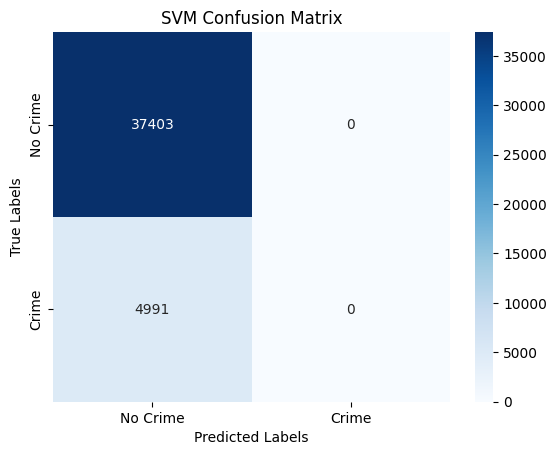

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     37403
         1.0       0.00      0.00      0.00      4991

    accuracy                           0.88     42394
   macro avg       0.44      0.50      0.47     42394
weighted avg       0.78      0.88      0.83     42394



c:\Users\nonak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nonak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nonak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [138]:
y_pred = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)

accuracy_svm = accuracy_score(y_test, y_pred)
train_accuracy_svm = accuracy_score(y_train, y_pred_train)
conf_matrix_svm = confusion_matrix(y_test, y_pred)

print(f"SVM - train Accuracy: {train_accuracy_svm:.2f}")
print(f"SVM - Accuracy: {accuracy_svm:.2f}")
print("SVM - Confusion Matrix:")
print(conf_matrix_svm)

sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Crime", "Crime"], yticklabels=["No Crime", "Crime"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("SVM Confusion Matrix")
plt.show()

print("Classification Report:")
cr=classification_report(y_test, y_pred)
print(cr)

joblib.dump(svm_model, 'svm_model')
metrics = {
    "accuracy": accuracy_svm, 
    "classification_report": cr,
     "confusion_matrix": conf_matrix.tolist()

}
model_arr.append("SVM")
accuracy_arr.append(accuracy_svm)
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("svm_metrics", index=False)


C:\Users\nonak\AppData\Local\Temp\ipykernel_18184\3853041525.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


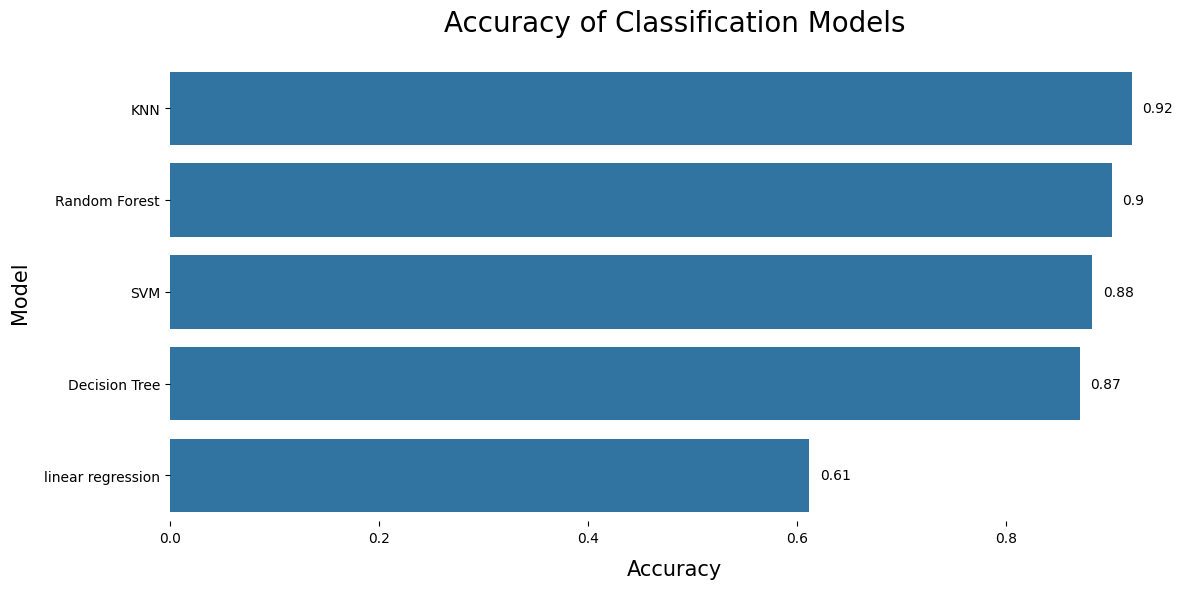

In [139]:
acc_df=pd.DataFrame(columns=['Model', 'Accuracy'])
acc_df['Model']=model_arr
acc_df['Accuracy']=accuracy_arr

plt.figure(figsize=(12, 6))
sorted_df = acc_df.sort_values('Accuracy', ascending=False)
ax = sns.barplot(data=sorted_df, y='Model', x='Accuracy', orient ="h")
ax.set_xlabel('Accuracy', fontsize=15, labelpad=10)
ax.set_ylabel('Model', fontsize=15, labelpad=10)
ax.set_title('Accuracy of Classification Models', fontsize=20, y=1.05)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Annotate the bars with their values
for patch in ax.patches:
    x = patch.get_x()
    y = patch.get_y()
    width = patch.get_width()
    height = patch.get_height()
    center_y = y + height / 2
    right_x = x + width
    ax.text(right_x + 0.01, center_y, round(width, 2),
            ha='left', va='center', fontsize=10)
    
plt.show()

In [140]:
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Beat,Ward,Community Area,Latitude,Longitude
0,0.801428,0.546358,0.733333,0.457447,0.761194,0.0,0.252888,0.306122,0.881579,0.953589,0.969989
1,0.831685,0.274834,0.900000,0.804965,0.126866,1.0,0.087871,0.081633,0.894737,0.952026,0.982588
2,0.696924,0.281457,0.900000,0.046099,0.761194,0.0,0.622937,0.775510,0.131579,0.993213,0.941886
3,0.830344,0.225166,1.000000,0.758865,0.888060,0.0,0.256601,0.326531,0.881579,0.951892,0.969172
4,0.153169,0.761589,0.066667,0.365248,0.574627,1.0,0.453795,0.510204,0.302632,0.977413,0.958012
